In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
data = pd.read_csv('Hong_Kong_International_Airport.csv')

data

,year,Month,Day,Mean_Windspeed,Wind_Direction,Mean_Tempurature,Humidity,Rainfall
0,2019,1,1,18.4,360,12.3,65,Trace
1,2019,1,2,16.5,350,13.5,65,Trace
2,2019,1,3,9.2,360,14.7,77,Trace
3,2019,1,4,14.4,320,17.9,84,0.3
4,2019,1,5,12.6,320,18.0,89,Trace
...,...,...,...,...,...,...,...,...
1881,2024,2,25,15.0,330,15.2,68,0
1882,2024,2,26,13.3,320,16.1,67,0
1883,2024,2,27,12.9,330,15.9,63,0
1884,2024,2,28,12.8,320,17.0,76,0.3


In [3]:
# Data Preprocessing
# Handle missing values, encode categorical variables, scale numerical features if needed

# Check for null values
null_values = data.isnull()
print("Null Values:")
print(null_values)
print("\nCount of Null Values in Each Column:")
print(null_values.sum())

Null Values:
       year  Month    Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     False  False  False           False           False             False   
1     False  False  False           False           False             False   
2     False  False  False           False           False             False   
3     False  False  False           False           False             False   
4     False  False  False           False           False             False   
...     ...    ...    ...             ...             ...               ...   
1881  False  False  False           False           False             False   
1882  False  False  False           False           False             False   
1883  False  False  False           False           False             False   
1884  False  False  False           False           False             False   
1885  False  False  False           False           False             False   

      Humidity  Rainfall  
0        Fa

In [4]:
df = pd.DataFrame(data)

# Check data types of columns
column_types = df.dtypes
print("Data Types of Columns:")
print(column_types)

Data Types of Columns:
year                  int64
Month                 int64
Day                   int64
Mean_Windspeed      float64
Wind_Direction        int64
Mean_Tempurature    float64
Humidity              int64
Rainfall             object
dtype: object


In [5]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Display numeric columns
print("Numeric Columns:")
print(numeric_columns)

Numeric Columns:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1881  2024      2   25            15.0             330              15.2   
1882  2024      2   26            13.3             320              16.1   
1883  2024      2   27            12.9             330              15.9   
1884  2024      2   28            12.8             320              17.0   
1885  2024      2   29            14.8             330              16.3   

      Humidity  
0           65  
1           65  
2           77  
3 

In [6]:
# Convert 'Value' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(df['Rainfall'], errors='coerce')

# Count the number of NaN values, which represent strings
num_strings = numeric_values.isna().sum()

print("Number of string values in 'Rainfall' column:", num_strings)

string_records = df[pd.to_numeric(df['Rainfall'], errors='coerce').isna()]
print("String records in 'Rainfall' column:")
print(string_records)


Number of string values in 'Rainfall' column: 380
String records in 'Rainfall' column:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
4     2019      1    5            12.6             320              18.0   
5     2019      1    6            14.9             330              17.7   
...    ...    ...  ...             ...             ...               ...   
1861  2024      2    5            10.1             340              19.6   
1862  2024      2    6            20.4              80              20.3   
1874  2024      2   18            16.4             100              23.3   
1876  2024      2   20            17.8             140              25.0   
1880  2024      2   24            13.8             330              16.8   



In [7]:
# fill with previouse value fill missing values backward along columns
df['Rainfall'] = numeric_values.bfill(axis=0)

print("DataFrame with string records in 'Value' column replaced with 0:")
print(df)

DataFrame with string records in 'Value' column replaced with 0:
      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1881  2024      2   25            15.0             330              15.2   
1882  2024      2   26            13.3             320              16.1   
1883  2024      2   27            12.9             330              15.9   
1884  2024      2   28            12.8             320              17.0   
1885  2024      2   29            14.8             330              16.3   

      Humidity  Rainfa

In [8]:
# Feature Engineering
# Extract relevant features from date columns, etc.

#Create date column
df['Date'] = df['Day'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['year'].astype(str)

print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1881  2024      2   25            15.0             330              15.2   
1882  2024      2   26            13.3             320              16.1   
1883  2024      2   27            12.9             330              15.9   
1884  2024      2   28            12.8             320              17.0   
1885  2024      2   29            14.8             330              16.3   

      Humidity  Rainfall       Date  
0           65       0.3   1-1-2019  
1          

In [9]:
# Convert 'Date' column to datetime with explicit format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.dtypes

year                         int64
Month                        int64
Day                          int64
Mean_Windspeed             float64
Wind_Direction               int64
Mean_Tempurature           float64
Humidity                     int64
Rainfall                   float64
Date                datetime64[ns]
dtype: object

In [10]:
df.set_index('Date')
print(df)

      year  Month  Day  Mean_Windspeed  Wind_Direction  Mean_Tempurature  \
0     2019      1    1            18.4             360              12.3   
1     2019      1    2            16.5             350              13.5   
2     2019      1    3             9.2             360              14.7   
3     2019      1    4            14.4             320              17.9   
4     2019      1    5            12.6             320              18.0   
...    ...    ...  ...             ...             ...               ...   
1881  2024      2   25            15.0             330              15.2   
1882  2024      2   26            13.3             320              16.1   
1883  2024      2   27            12.9             330              15.9   
1884  2024      2   28            12.8             320              17.0   
1885  2024      2   29            14.8             330              16.3   

      Humidity  Rainfall       Date  
0           65       0.3 2019-01-01  
1          

<Axes: >

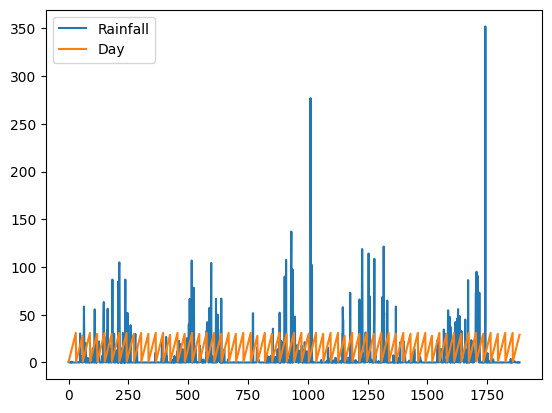

In [11]:
df [['Rainfall','Day']].plot()

In [12]:

# Split the data into train and test sets
X = df[['Date', 'Mean_Windspeed', 'Wind_Direction', 'Mean_Tempurature', 'Humidity']]
y = df['Rainfall']

print('Print X')
print(X)

print('Print y')
print(y)


Print X
           Date  Mean_Windspeed  Wind_Direction  Mean_Tempurature  Humidity
0    2019-01-01            18.4             360              12.3        65
1    2019-01-02            16.5             350              13.5        65
2    2019-01-03             9.2             360              14.7        77
3    2019-01-04            14.4             320              17.9        84
4    2019-01-05            12.6             320              18.0        89
...         ...             ...             ...               ...       ...
1881 2024-02-25            15.0             330              15.2        68
1882 2024-02-26            13.3             320              16.1        67
1883 2024-02-27            12.9             330              15.9        63
1884 2024-02-28            12.8             320              17.0        76
1885 2024-02-29            14.8             330              16.3        85

[1886 rows x 5 columns]
Print y
0       0.3
1       0.3
2       0.3
3       0.3

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X.drop(['Date'], axis = 1), y, test_size=0.2, random_state=42)


In [19]:
# Select a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 8.85578040099766


In [26]:
# Predict rainfall for new data points
# For example:
new_data = pd.DataFrame({
    'Mean_Windspeed' : [10, 23, 23, 224, 34] 
    ,'Wind_Direction' : [310, 324, 334, 453, 56]
    ,'Mean_Tempurature': [25, 34, 45, 56, 77]
    ,'Humidity' : [60, 23, 56, 77, 88]
    })
predicted_rainfall = model.predict(new_data)
print('Predicted Rainfall:', predicted_rainfall)

Predicted Rainfall: [ -3.94775978 -15.48599883   2.73073124 120.35449861  31.80971563]
